Unsupervised learning techniques are those that involve training with or analyzing unlabeled data. Dimensionality reduction, for instance, is an unsupervised learning task.

Other examples:

- **Clustering**: group similar instance together into clusters. Useful for data analysis, segmentation, recommender systems, serach engines, semi-supervised learning, and dimensionality reduction.

- **Anomaly Detection**: a predictor is trained to recognize 'normal' instances in order to detect abnormalities. Useful for defect detection and identifying new trends.

- **Density Estimation**: estimates the probability density function (PDF) of the random process that generated the dataset. Useful for anomaly detection, data analysis, and visualization.

Topics:

- Clustering
    - K-Means Algorithm
    - Segmentation
    - Preprocessing
    - Semi-Supervised Learning
    - DBSCAN Algorithm
    - Other Algorithms
- Gaussian Mixtures
    - Anomaly Detection
    - Bayesian Models
    - Other Algorithms

# Clustering

**Clustering** is the task of identifying similar instances and assigning them to clusters.

Some applications:

- **Customer segmentation**: clustering customers based on purchases and activity, and adapt products and marketing to each segment. Useful for recommender systems.
- **Data analysis**: clustering instances based on feature relationships. Useful for gaining early insights and separating the data.
- **Dimensionality reduction**: after clustering a dataset, each instance can be redefined according to its affinity with each cluster, reducing dimensionality to the (much lower) number of clusters while preserving most of the information.
- **Anomaly detection**: identifying instances with low cluster affinities to detect outliers.
- **Semi-supervised learning**: clustering a partially-labeled dataset, and then propagating the labels to like-instances for a subsequent supervised training stage.
- **Search engines**: clustering a collection of images, then returning the best-matching cluster when a reference image is provided.
- **Image segmentation**: clustering pixels according to color, then replacing each with its cluster's mean color. Useful for object and contour detection, tracking systems.

## K-Means Algorithm

The **K-Means** algorithm attempts to identify $k$ 'blobs' of like-data and determine the center of each.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

# Sample blob data centers
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

# Standard deviations for each blob
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# Generate sample blobs 
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=47)

In [2]:
import matplotlib.pyplot as plt

# Helper function to plot clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

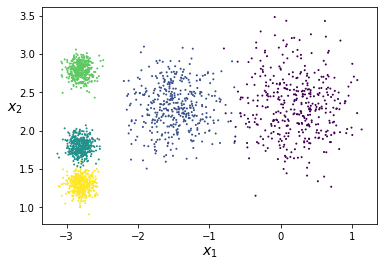

In [3]:
# Plot sample dataset, identifying each cluster with a color
plot_clusters(X, y)

In [4]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [5]:
# The training set labels are preserved
y_pred is kmeans.labels_

True

In [6]:
# Access the kmeans cluster centers
kmeans.cluster_centers_

array([[-1.4684875 ,  2.31655447],
       [-2.79524351,  1.79985624],
       [ 0.21494229,  2.32682611],
       [-2.80220997,  2.78658057],
       [-2.79611971,  1.29657896]])

In [7]:
# Predict new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

In [8]:
# Transform measures the distance from each instance to the center of each cluster
kmeans.transform(X_new)

array([[1.50221911, 2.80239965, 0.39117195, 2.91051365, 2.88324238],
       [4.47968606, 5.79869855, 2.80416864, 5.85528389, 5.83864752],
       [1.67708925, 1.21748522, 3.28466391, 0.29097895, 1.71557874],
       [1.54245999, 0.72947002, 3.21960295, 0.34820873, 1.22056929]])

The K-means algorithm works by selecting instances at random to be used as centroids for each cluster, labeling the instances relative to the centroids, updating the chosen centroids, and repeating until the centroids converge to ideal locations.

Depending on the initial centroids, the algorithm may converge to a local optimum. This can be avoided if the cluster locations can be approximated during initial exploration, and the centroids initialized in the appropriate areas.

In [9]:
init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_a = KMeans(n_clusters=5, init=init, n_init=1)
kmeans_a

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another method is to increase the number of initializations (n_init) to try a number of different random initializations and keep the best solution.

In [10]:
kmeans_b = KMeans(n_clusters=5, n_init=10)
kmeans_b

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

The performance of a K-means algorithm can be measured by its *inertia*, or the mean squared distance between each instance and the nearest centroid.

In [11]:
kmeans_a.fit(X)
kmeans_a.inertia_

218.83999258014802

In [12]:
kmeans_b.fit(X)
kmeans_b.inertia_

218.83999258014802

In [13]:
# The score is negative inertia so optimization will search for the highest value
kmeans_a.score(X)

-218.83999258014836

The K-means++ initialization algorithm involves a step to encourage separation between the random centroids.

*K-means++ algorithm*:

1. A centroid $\mathbf{c}^{(1)}$ is chosen uniformly at random.

2. A second centroid $\mathbf{c}^{(i)}$ is chosen as $\mathbf{x}^{(i)}$ with probability $D\bigl( \mathbf{x}^{(i)} \bigr)^2 / \sum_{j=1}^m D\bigl( \mathbf{x}^{(i)} \bigr)^2$, where $D(\mathbf{{x}^{(i)}})$ is the distance between $\mathbf{x}^{(i)}$ and the nearest known centroid.

3. Repeat until $k$ centroids have been chosen.

Another form of the K-means algorithm is the mini-batch method, which uses a subset of the data to iteratively train the predictor. This is much faster at the cost of higher inertia, and can be used for online training.

In [15]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=5)
mb_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Determining an optimal number of clusters can be handled programmatically by calculating the *silhouette score*, or the mean of the silhouette coefficient over all instances.

An instance's silhouette coefficient is calculated as $\frac{b-a}{max(a, b)}$, where $a$ is the mean distance to other instances in the same cluster, and $b$ is the mean distance to the instances in the next nearest cluster. This value varies between -1 and +1.

- A coefficient near +1 indicates it is well inside its own cluster and far from others.
- A coefficient near 0 indicates it is near a cluster boundary.
- A coefficient near -1 indicates a high likelihood that it's been assigned to the wrong cluster.

In [16]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6490930572066652

In [24]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    print(f'k = {k} score: {silhouette_score(X, kmeans.labels_)}')

k = 2 score: 0.6009977436176899
k = 3 score: 0.5730356596035047
k = 4 score: 0.6805301055233608
k = 5 score: 0.6490930572066652
k = 6 score: 0.5930588320189178
k = 7 score: 0.5980179713685683
